In [2]:
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

#### read dataset

In [51]:
train_df = pd.read_csv('train.csv')
train_df.head()

,Image_path,Insurance_company,Cost_of_vehicle,Min_coverage,Expiry_date,Max_coverage,Condition,Amount
0,img_4513976.jpg,BQ,41500.0,1037.5,2026-12-03,36142.68,0,0.0
1,img_7764995.jpg,BQ,50700.0,1267.5,2025-07-10,12753.00,1,6194.0
2,img_451308.jpg,A,49500.0,1237.5,2022-08-11,43102.68,0,0.0
3,img_7768372.jpg,A,33500.0,837.5,2022-08-02,8453.00,1,7699.0
4,img_7765274.jpg,AC,27600.0,690.0,2026-05-01,6978.00,1,8849.0


In [4]:
test_df = pd.read_csv("test.csv")
test_df.head()

,Image_path,Insurance_company,Cost_of_vehicle,Min_coverage,Expiry_date,Max_coverage
0,img_4538519.jpg,B,23600,590.0,2025-04-12,5978.0
1,img_7766002.jpg,C,28300,707.5,2028-08-24,7153.0
2,img_4637390.jpg,AC,43700,1092.5,2023-11-28,11003.0
3,img_4516108.jpg,BB,46100,1152.5,2028-02-04,11603.0
4,img_4517008.jpg,BB,40700,1017.5,2022-01-03,10253.0


It is clear that we need to predict Condition of a car based on image and the amount which will get after insurance process complete.<br>
- condition = 0 then amount 0<br>
- 1 then amount A

### understanding data

#### Categorical data

columns are Insurance_company having 11 Insurance Company

In [52]:
train_df.groupby(['Insurance_company']).count()['Amount']

Insurance_company
A     132
AA    121
AC    119
B     145
BB    123
BC    119
BQ    130
C     131
DA    128
O     125
RE    115
Name: Amount, dtype: int64

#### Numerical data

In [53]:
train_df[train_df.columns[2:]].describe()

,Cost_of_vehicle,Min_coverage,Max_coverage,Condition,Amount
count,1310.000000,1310.000000,1310.000000,1399.000000,1388.000000
mean,37454.274809,936.356870,11242.925160,0.929235,4117.144092
std,8921.428143,223.035704,7163.735952,0.256523,3151.516223
min,11100.000000,277.500000,2853.000000,0.000000,-999.000000
25%,29800.000000,745.000000,7603.000000,1.000000,1641.750000
50%,37300.000000,932.500000,9678.000000,1.000000,4070.000000
75%,45175.000000,1129.375000,11703.000000,1.000000,6039.500000
max,53500.000000,1337.500000,46495.680000,1.000000,59844.000000


#### null values 

In [54]:
train_df[train_df.columns[2:]].isna().sum()

Cost_of_vehicle    89
Min_coverage       89
Expiry_date         0
Max_coverage       89
Condition           0
Amount             11
dtype: int64

#### remove row having amount is nan

In [55]:
train_df.drop(train_df[train_df.Amount.isna()].index, inplace = True)

In [56]:
train_df.shape

(1388, 8)

#### Cost_of_vehicle column

In [57]:
train_df.groupby(['Insurance_company']).mean()

,Cost_of_vehicle,Min_coverage,Max_coverage,Condition,Amount
Insurance_company,,,,,
A,38114.285714,952.857143,11837.019683,0.916667,4284.962121
AA,37195.575221,929.889381,12121.461593,0.900826,4448.429752
AC,37807.272727,945.181818,10733.800727,0.949580,3942.773109
B,36621.582734,915.539568,10333.247770,0.944828,4272.013793
BB,36931.623932,923.290598,11362.998291,0.918699,3893.113821
BC,37838.260870,945.956522,11708.911304,0.915966,4139.495798
BQ,38622.131148,965.553279,12191.271803,0.907692,4281.000000
C,36791.935484,919.798387,10923.882581,0.938931,3703.198473
DA,36668.750000,916.718750,10829.396786,0.937500,4144.148438


<AxesSubplot:>

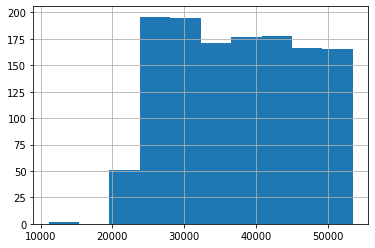

In [58]:
train_df.Cost_of_vehicle.hist()

Due to anomaly in Cost_of_vehicle

In [59]:
train_df.drop(train_df[train_df.Cost_of_vehicle<20000].index, inplace = True)

<AxesSubplot:>

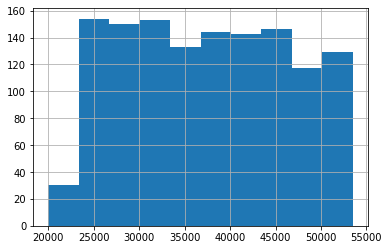

In [60]:
train_df.Cost_of_vehicle.hist()

In [61]:
insurance_company = train_df['Insurance_company'].unique()

insurance_company

array(['BQ', 'A', 'AC', 'BC', 'DA', 'BB', 'C', 'O', 'B', 'AA', 'RE'],
      dtype=object)

In [78]:
train_df.groupby(['Insurance_company']).mean()

,Cost_of_vehicle,Min_coverage,Max_coverage,Condition,Amount
Insurance_company,,,,,
A,38114.285714,952.857143,11837.019683,0.916667,4284.962121
AA,37195.575221,929.889381,12121.461593,0.900826,4448.429752
AC,38016.513761,950.412844,10797.156697,0.949153,3950.559322
B,36806.521739,920.163043,10387.452464,0.944444,4298.750000
BB,36931.623932,923.290598,11362.998291,0.918699,3893.113821
BC,37838.260870,945.956522,11708.911304,0.915966,4139.495798
BQ,38622.131148,965.553279,12191.271803,0.907692,4281.000000
C,36791.935484,919.798387,10923.882581,0.938931,3703.198473
DA,36668.750000,916.718750,10829.396786,0.937500,4144.148438


In [85]:
avg_of_data.keys()

dict_keys(['A', 'AA', 'AC', 'B', 'BB', 'BC', 'BQ', 'C', 'DA', 'O', 'RE'])

#### Average Values based on Insurance_company fill nan

In [110]:
train_df['Cost_of_vehicle'] = train_df.groupby(['Insurance_company'])['Cost_of_vehicle'].apply( lambda x: x.fillna(x.mean()))

train_df['Min_coverage'] = train_df.groupby(['Insurance_company'])['Min_coverage'].apply( lambda x: x.fillna(x.mean()))

train_df['Max_coverage'] = train_df.groupby(['Insurance_company'])['Max_coverage'].apply( lambda x: x.fillna(x.mean()))

In [111]:
train_df[train_df.columns[2:]].isna().sum()

Cost_of_vehicle    0
Min_coverage       0
Expiry_date        0
Max_coverage       0
Condition          0
Amount             0
dtype: int64

#### Image_path having isna?

In [118]:
train_df[train_df.Image_path.isna()]

,Image_path,Insurance_company,Cost_of_vehicle,Min_coverage,Expiry_date,Max_coverage,Condition,Amount


#### Min Coverage Histogram

<AxesSubplot:>

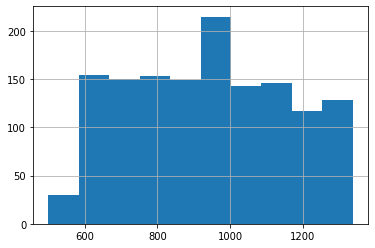

In [120]:
train_df.Min_coverage.hist()

#### Max Coverage Histogram

<AxesSubplot:>

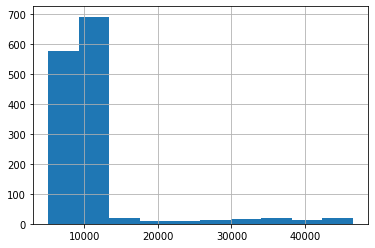

In [121]:
train_df.Max_coverage.hist()

In [131]:
train_df.to_csv("train_update.csv",index=False)

Image_path           img_4513976.jpg
Insurance_company                 BQ
Cost_of_vehicle              41500.0
Min_coverage                  1037.5
Expiry_date               2026-12-03
Max_coverage                36142.68
Condition                          0
Amount                           0.0
Name: 0, dtype: object


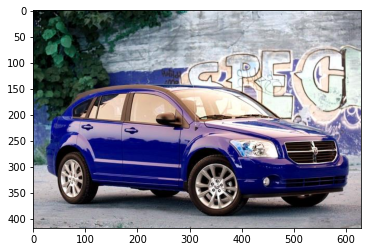

In [130]:
img = cv2.imread("trainImages/"+train_df.Image_path[0])
print(train_df.iloc[0])
plt.imshow(img)